In [3]:
# a simple neural net

import numpy as np

# Simple neural network with one hidden layer
# Loss function: L = (y - ŷ)²
# ŷ = w2 * sigmoid(w1 * x + b1) + b2
# where sigmoid(z) = 1/(1 + e^(-z))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def sigmoid_second_derivative(z):
    s = sigmoid(z)
    return s * (1 - s) * (1 - 2*s)

# Example computation for a single data point
x = 2.0    # input
y = 1.0    # true output
w1 = 0.5   # weight 1
w2 = 0.8   # weight 2
b1 = 0.1   # bias 1
b2 = 0.0   # bias 2

# Forward pass
z1 = w1 * x + b1
a1 = sigmoid(z1)
y_pred = w2 * a1 + b2

# Loss
L = (y - y_pred)**2

# Forward pass
z1 = w1 * x + b1
print(f'{z1} = {w1} * {x} + {b1}')

a1 = sigmoid(z1)
print(f'{a1} = sigmoid({z1})')

y_pred = w2 * a1 + b2
print(f'{y_pred} = {w2} * {a1} + {b2}')

L = (y - y_pred)**2
print(f'{L} = ({y} - {y_pred}**2')

1.1 = 0.5 * 2.0 + 0.1
0.7502601055951177 = sigmoid(1.1)
0.6002080844760942 = 0.8 * 0.7502601055951177 + 0.0
0.15983357571827383 = (1.0 - 0.6002080844760942**2


# gradients

In [ ]:
f = [0,1,2]
x = [3,4,5]
[
    [f[0]/x[0], f[0]/x[1], f[0],x[2]],
    [f[1]/x[0], f[1]/x[1], f[1]/x[2]],
    [f[2]/x[0], f[2]/x[1], f[2]/x[2]]
]

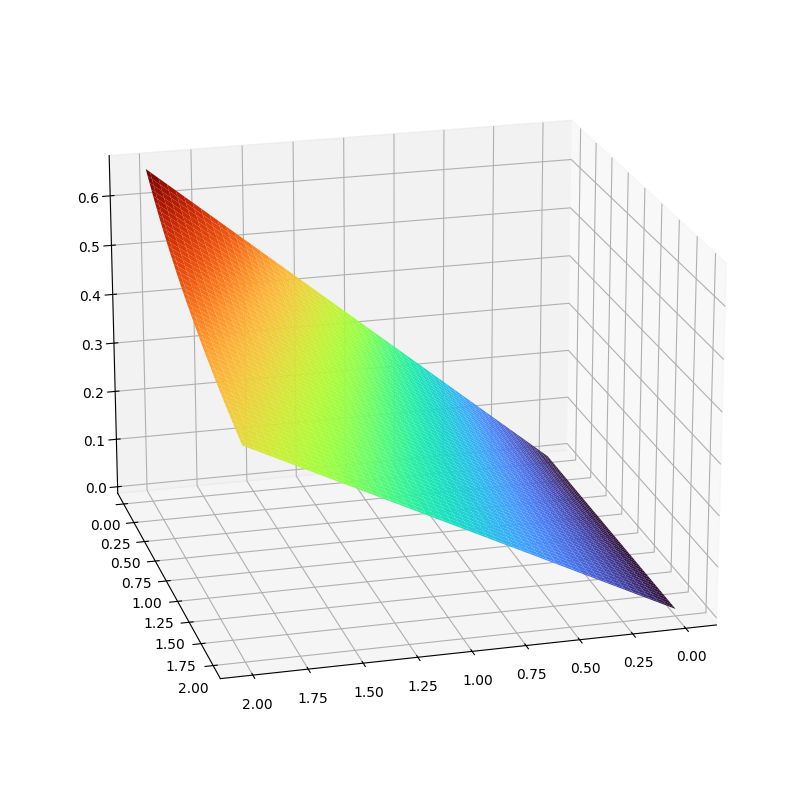

In [4]:
# Original discrete version:
f = [0, 1, 2]
x = [3, 4, 5]

# To make it continuous, we can observe that:
# - i represents the row number (from f)
# - j represents the column number (from x)
# The pattern is: F(i,j) = i/(j+3)

# As a continuous function:
def F(i, j):
    return i/(j+3)

# Now we can find any point, even non-integer values:
# F(1.5, 0.5) would be valid
# F(π, 2) would be valid

# This represents how F changes as we move vertically
def dF_di(i, j):
    return 1/(j+3)  # derivative of i/(j+3) with respect to i

# This represents how F changes as we move horizontally
def dF_dj(i, j):
    return -i/(j+3)**2  # derivative of i/(j+3) with respect to j

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example plotting code:
i = np.linspace(0, 2, 100)
j = np.linspace(0, 2, 100)
I, J = np.meshgrid(i, j)
Z = I/(J+3)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(I, J, Z, cmap='turbo')
ax.view_init(elev=20, azim=75)
plt.show()

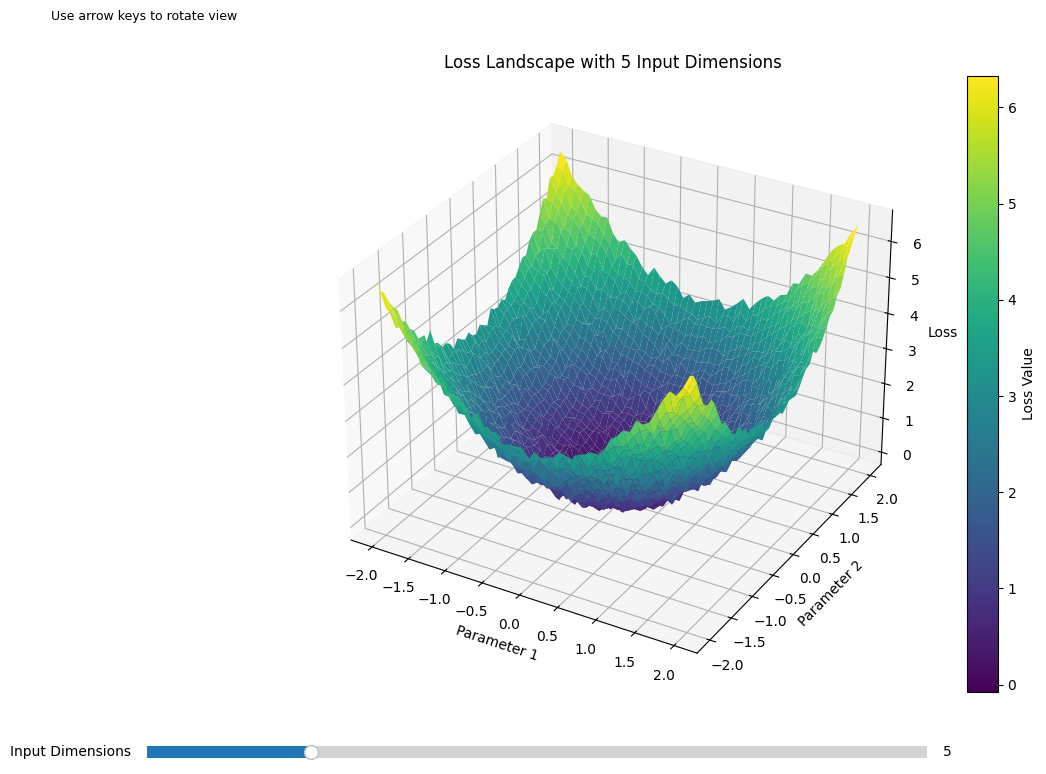

In [5]:
# hessian loss matrix

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider

# Create a function that generates a random Hessian-like surface
def generate_hessian_surface(n_points, input_dim):
    # Create random weights to simulate network parameters
    weights = np.random.randn(input_dim)
    
    # Create grid of points
    x = np.linspace(-2, 2, n_points)
    y = np.linspace(-2, 2, n_points)
    X, Y = np.meshgrid(x, y)
    
    # Simulate loss surface with quadratic form (Hessian approximation)
    Z = np.zeros_like(X)
    for i in range(input_dim):
        Z += weights[i] * (X**2 + Y**2) / (i + 1)
    
    # Add some noise to make it more realistic
    Z += np.random.randn(n_points, n_points) * 0.1
    
    return X, Y, Z

# Create the figure and 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Initial plot
n_points = 50
initial_dim = 5
X, Y, Z = generate_hessian_surface(n_points, initial_dim)
surface = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add colorbar
fig.colorbar(surface, ax=ax, label='Loss Value')

# Labels
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Loss')
ax.set_title(f'Loss Landscape with {initial_dim} Input Dimensions')

# Add slider for input dimensions
ax_slider = plt.axes([0.1, 0.02, 0.65, 0.03])
slider = Slider(
    ax=ax_slider,
    label='Input Dimensions',
    valmin=1,
    valmax=20,
    valinit=initial_dim,
    valstep=1
)

# Update function for slider
def update(val):
    ax.clear()
    X, Y, Z = generate_hessian_surface(n_points, int(val))
    surface = ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('Parameter 1')
    ax.set_ylabel('Parameter 2')
    ax.set_zlabel('Loss')
    ax.set_title(f'Loss Landscape with {int(val)} Input Dimensions')
    fig.canvas.draw_idle()

slider.on_changed(update)

# Add rotation controls
def rotate_view(event):
    if event.key == 'left':
        ax.view_init(elev=ax.elev, azim=ax.azim - 10)
    elif event.key == 'right':
        ax.view_init(elev=ax.elev, azim=ax.azim + 10)
    elif event.key == 'up':
        ax.view_init(elev=ax.elev + 10, azim=ax.azim)
    elif event.key == 'down':
        ax.view_init(elev=ax.elev - 10, azim=ax.azim)
    fig.canvas.draw()

fig.canvas.mpl_connect('key_press_event', rotate_view)

# Add some interactivity instructions
plt.figtext(0.02, 0.95, 'Use arrow keys to rotate view', fontsize=9)

plt.show()

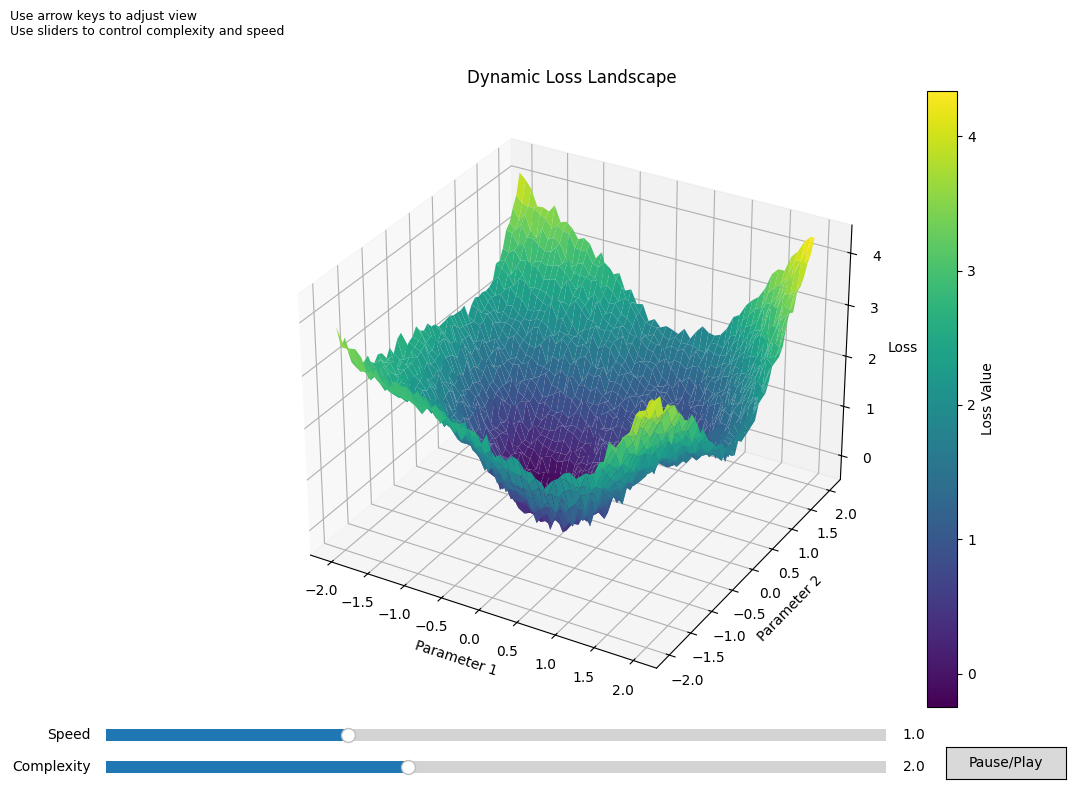

In [6]:
# a wider loss landscape

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button

# Create more interesting Hessian-like surface
def generate_dynamic_surface(n_points, time, complexity):
    x = np.linspace(-2, 2, n_points)
    y = np.linspace(-2, 2, n_points)
    X, Y = np.meshgrid(x, y)
    
    # Base quadratic surface
    Z = 0.5 * (X**2 + Y**2)
    
    # Add time-varying components
    Z += 0.5 * np.sin(complexity * X + time) * np.cos(complexity * Y + time)
    Z += 0.3 * np.cos(complexity * X - time) * np.sin(complexity * Y - time)
    
    # Add moving wave patterns
    Z += 0.2 * np.sin(np.sqrt(X**2 + Y**2) - time)
    
    # Add some randomness that changes with time
    np.random.seed(int(time * 100))
    Z += np.random.randn(n_points, n_points) * 0.1
    
    return X, Y, Z

# Alternative surface generation for different behaviors
def generate_alternative_surface(n_points, time, complexity):
    x = np.linspace(-2, 2, n_points)
    y = np.linspace(-2, 2, n_points)
    X, Y = np.meshgrid(x, y)
    
    # Create spiral patterns
    R = np.sqrt(X**2 + Y**2)
    theta = np.arctan2(Y, X)
    
    Z = np.sin(R - time) * np.cos(theta * complexity)
    Z += 0.5 * (X**2 + Y**2) * np.sin(time)
    
    return X, Y, Z


# Set up the figure and 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Initial parameters
n_points = 50
complexity = 2
time = 0

# Create initial surface
X, Y, Z = generate_dynamic_surface(n_points, time, complexity)
surface = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add colorbar
fig.colorbar(surface, ax=ax, label='Loss Value')

# Labels
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Loss')
ax.set_title('Dynamic Loss Landscape')

# Animation speed control
speed = 1.0

# Add sliders
ax_complexity = plt.axes([0.1, 0.02, 0.65, 0.03])
ax_speed = plt.axes([0.1, 0.06, 0.65, 0.03])

s_complexity = Slider(
    ax=ax_complexity,
    label='Complexity',
    valmin=0.1,
    valmax=5.0,
    valinit=complexity
)

s_speed = Slider(
    ax=ax_speed,
    label='Speed',
    valmin=0.1,
    valmax=3.0,
    valinit=speed
)

# Animation update function
def update(frame):
    ax.clear()
    
    # Get current complexity and speed values
    current_complexity = s_complexity.val
    current_time = frame * s_speed.val
    
    # Generate new surface
    X, Y, Z = generate_dynamic_surface(n_points, current_time, current_complexity)
    
    # Plot new surface
    surface = ax.plot_surface(X, Y, Z, cmap='viridis')
    
    # Set labels and limits
    ax.set_xlabel('Parameter 1')
    ax.set_ylabel('Parameter 2')
    ax.set_zlabel('Loss')
    ax.set_title(f'Dynamic Loss Landscape (t={current_time:.1f})')
    
    # Set consistent view limits
    ax.set_zlim(-2, 4)
    
    # Set viewing angle
    ax.view_init(elev=30, azim=frame/2)  # Slowly rotate view
    
    return surface,

# Create animation
anim = animation.FuncAnimation(
    fig, 
    update, 
    frames=200,
    interval=50,
    blit=False,
    repeat=True
)

# Add pause/play button
ax_button = plt.axes([0.8, 0.02, 0.1, 0.04])
btn = Button(ax_button, 'Pause/Play')

# Pause/play functionality
anim_running = True

def onClick(event):
    global anim_running
    if anim_running:
        anim.event_source.stop()
        anim_running = False
    else:
        anim.event_source.start()
        anim_running = True

btn.on_clicked(onClick)

# Add rotation controls
def rotate_view(event):
    if event.key == 'left':
        ax.view_init(elev=ax.elev, azim=ax.azim - 10)
    elif event.key == 'right':
        ax.view_init(elev=ax.elev, azim=ax.azim + 10)
    elif event.key == 'up':
        ax.view_init(elev=ax.elev + 10, azim=ax.azim)
    elif event.key == 'down':
        ax.view_init(elev=ax.elev - 10, azim=ax.azim)

fig.canvas.mpl_connect('key_press_event', rotate_view)

# Add instructions
plt.figtext(0.02, 0.95, 'Use arrow keys to adjust view\nUse sliders to control complexity and speed', fontsize=9)

plt.show()